# Data Preprocessing


In [1]:
#imported the required libraries

import pandas as pd
import numpy as np
import datetime
from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Acquired Singapore HDB flat resale data (1990-2024) from the official website in CSV format


In [5]:
df1=pd.read_csv("/content/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [6]:
df2=pd.read_csv("/content/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [7]:
df3=pd.read_csv("/content/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [8]:
df4=pd.read_csv("/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [9]:
df5=pd.read_csv("/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182483 entries, 0 to 182482
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                182483 non-null  object 
 1   town                 182483 non-null  object 
 2   flat_type            182483 non-null  object 
 3   block                182483 non-null  object 
 4   street_name          182483 non-null  object 
 5   storey_range         182483 non-null  object 
 6   floor_area_sqm       182483 non-null  float64
 7   flat_model           182483 non-null  object 
 8   lease_commence_date  182483 non-null  int64  
 9   remaining_lease      182483 non-null  object 
 10  resale_price         182483 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.3+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [10]:
# Handle potential changes in the remaining_lease column

df5['remaining_lease']=df5['remaining_lease'].str.split(' ').str[0].astype(int)
df5.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0


In [11]:
# Combine the dataset using concat

df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928686 entries, 0 to 928685
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                928686 non-null  object 
 1   town                 928686 non-null  object 
 2   flat_type            928686 non-null  object 
 3   block                928686 non-null  object 
 4   street_name          928686 non-null  object 
 5   storey_range         928686 non-null  object 
 6   floor_area_sqm       928686 non-null  float64
 7   flat_model           928686 non-null  object 
 8   lease_commence_date  928686 non-null  int64  
 9   resale_price         928686 non-null  float64
 10  remaining_lease      219636 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 77.9+ MB


In [12]:
#split the year in the month column
df[['year','month']]=df['month'].str.split('-',expand=True)
df['block'] = df['block'].str.split(r'(\D)', expand=True)[0].astype('int64')

#split the storeyrange
df[['storey_start','storey_end']]=df['storey_range'].str.split('TO',expand=True)

#changing the following columns into numeric
df['month']=pd.to_numeric(df['month'])
df['year']=pd.to_numeric(df['year'])
df['floor_area_sqm']=pd.to_numeric(df['floor_area_sqm'])
df['resale_price']=pd.to_numeric(df['resale_price'])
df['storey_start']=pd.to_numeric(df['storey_start'])
df['storey_end']=pd.to_numeric(df['storey_end'])

df.drop(columns='storey_range',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928686 entries, 0 to 928685
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                928686 non-null  int64  
 1   town                 928686 non-null  object 
 2   flat_type            928686 non-null  object 
 3   block                928686 non-null  int64  
 4   street_name          928686 non-null  object 
 5   floor_area_sqm       928686 non-null  float64
 6   flat_model           928686 non-null  object 
 7   lease_commence_date  928686 non-null  int64  
 8   resale_price         928686 non-null  float64
 9   remaining_lease      219636 non-null  float64
 10  year                 928686 non-null  int64  
 11  storey_start         928686 non-null  int64  
 12  storey_end           928686 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 92.1+ MB


In [13]:
# Checkig null values

df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
storey_start                0
storey_end                  0
dtype: int64

In [14]:
#handle the null values
df['remaining_lease'].fillna(99-(df['year']-df['lease_commence_date']),inplace=True)

mask= df['remaining_lease']>99
df=df[~mask]

In [15]:
df.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
storey_start           0
storey_end             0
dtype: int64

In [16]:
#handle the str error
df['flat_model']=df['flat_model'].str.upper()

df['flat_type']=df['flat_type'].replace({'MULTI GENERATION': 'MULTI-GENERATION'})

In [17]:
# Adding a new feature to improve results
df['price_per_sqm']=df['resale_price']/df['floor_area_sqm']

df['years_holding']=df['year']-df['lease_commence_date']

current_year =datetime.datetime.now().year

df['current_remaining_lease']=df['remaining_lease']-(current_year-df['year'])

df['age_of_property']=current_year-df['lease_commence_date']

In [18]:
df

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,storey_start,storey_end,price_per_sqm,years_holding,current_remaining_lease,age_of_property
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0,47
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0,47
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0,47
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0,47
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928681,6,YISHUN,EXECUTIVE,328,YISHUN RING RD,142.0,APARTMENT,1988,850000.0,63.0,2024,4,6,5985.915493,36,63.0,36
928682,6,YISHUN,EXECUTIVE,723,YISHUN ST 71,146.0,MAISONETTE,1986,790000.0,61.0,2024,10,12,5410.958904,38,61.0,38
928683,6,YISHUN,EXECUTIVE,826,YISHUN ST 81,146.0,MAISONETTE,1988,1000000.0,62.0,2024,10,12,6849.315068,36,62.0,36
928684,6,YISHUN,EXECUTIVE,826,YISHUN ST 81,146.0,MAISONETTE,1988,1000000.0,62.0,2024,4,6,6849.315068,36,62.0,36


In [19]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
month,928635.0,6.549709,3.410829,1.000000,4.000000,7.000000,10.000000,1.200000e+01
block,928635.0,348.771110,255.131417,1.000000,127.000000,302.000000,534.000000,9.990000e+02
floor_area_sqm,928635.0,95.687872,25.822008,28.000000,73.000000,93.000000,113.000000,3.070000e+02
lease_commence_date,928635.0,1988.290145,10.678569,1966.000000,1981.000000,1986.000000,1996.000000,2.020000e+03
resale_price,928635.0,321230.726006,170892.498456,5000.000000,193000.000000,298000.000000,418000.000000,1.588000e+06
remaining_lease,928635.0,80.989249,10.802844,41.000000,74.000000,83.000000,90.000000,9.900000e+01
year,928635.0,2006.198305,9.340958,1990.000000,1999.000000,2005.000000,2014.000000,2.024000e+03
storey_start,928635.0,6.684004,4.823417,1.000000,4.000000,7.000000,10.000000,4.900000e+01
storey_end,928635.0,8.698731,4.823406,3.000000,6.000000,9.000000,12.000000,5.100000e+01
price_per_sqm,928635.0,3322.414303,1536.602638,161.290323,2292.682927,2959.183673,4207.317073,1.559140e+04


# skewness and outliers


In [41]:
#function for plot
def compare_chart(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,4,figsize=(20,5))

        sns.histplot(data=df, x=col1, kde=True, bins=20,ax= axs[0])
        axs[0].set_title(f"{col1} after log transformation")

        sns.boxplot(data=df, y=col1, ax=axs[1], palette=["orange"])
        axs[1].set_title(f"{col1} after outliers handle")

        sns.histplot(data=df, x=col2, kde=True, bins=20,ax= axs[2], color='green')
        axs[2].set_title(f"{col2} before log transformation")

        sns.boxplot(data=df, y=col2, ax=axs[3], color='#BD1313')
        axs[3].set_title(f"{col2} before outliers handle")

        plt.tight_layout()
        plt.show()

In [21]:
# Skewness handle with log transformation

df['floor_area_sqm_log']=np.log(df['floor_area_sqm'])
df['resale_price_log']=np.log(df['resale_price'])
df['remaining_lease_log']=np.log1p(df['remaining_lease'])
df['price_per_sqm_log']=np.log(df['price_per_sqm'])

In [22]:
# Outliers handle with IQR and cliping method

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [23]:
outlier(df,'floor_area_sqm_log')
outlier(df,'resale_price_log')
outlier(df,'remaining_lease_log')
outlier(df,'price_per_sqm_log')

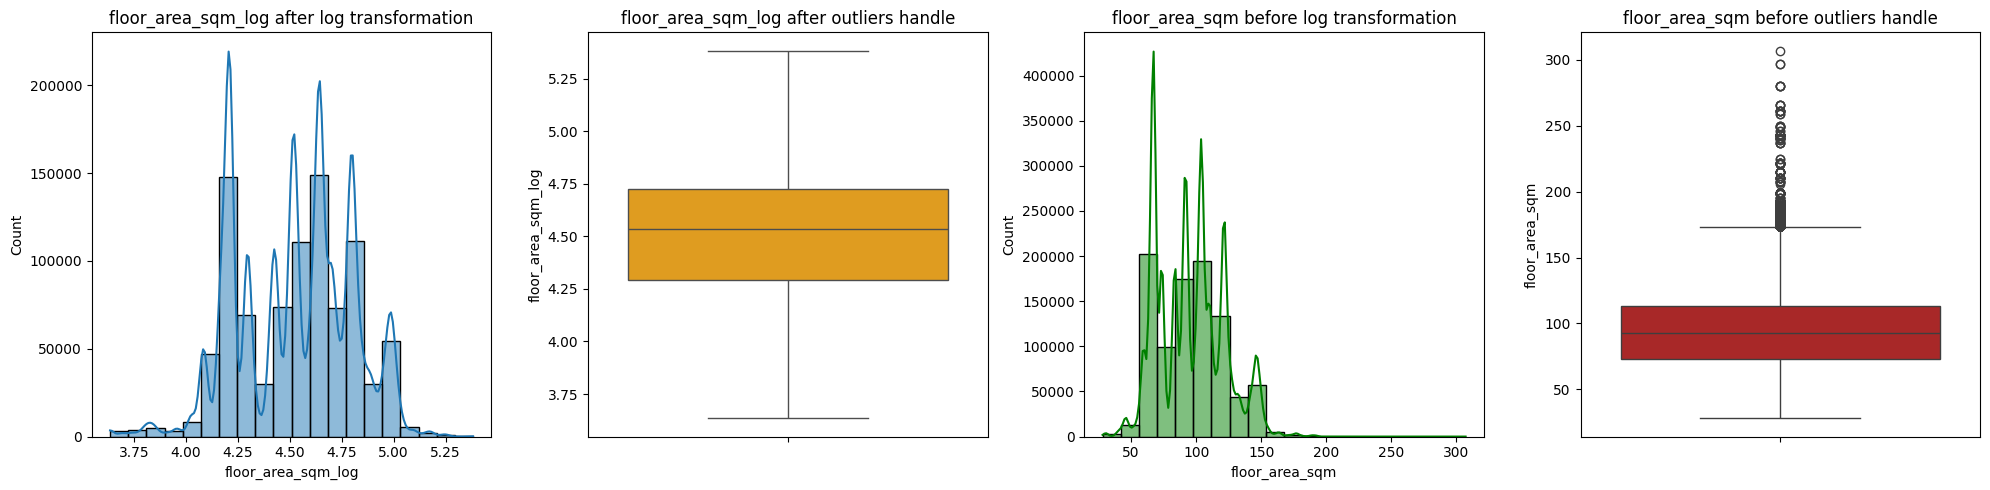

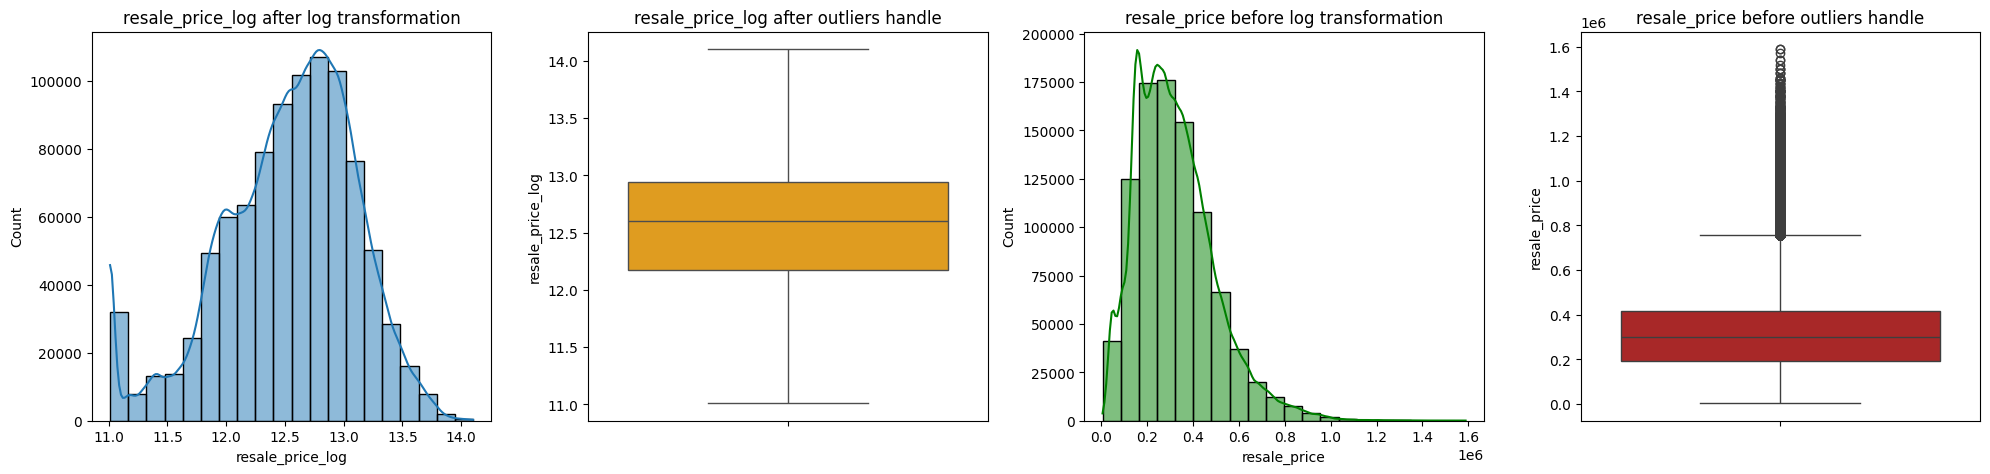

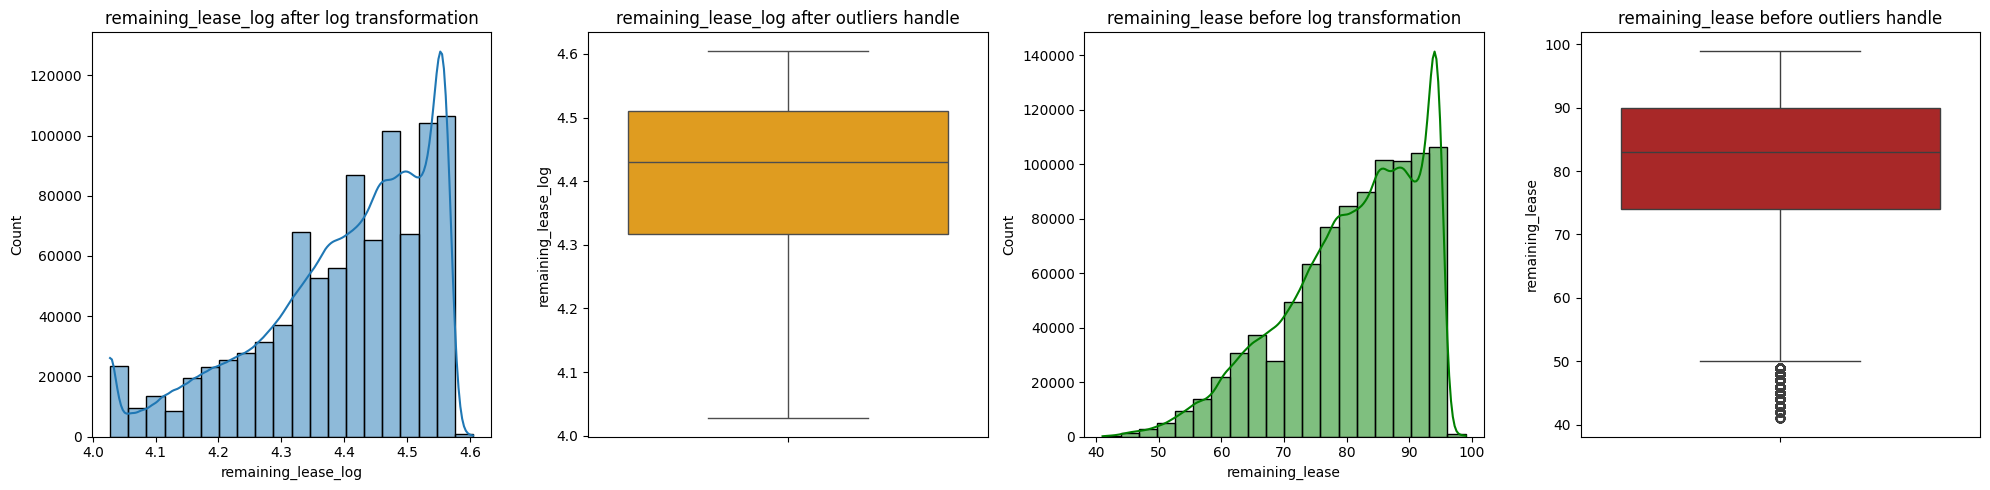

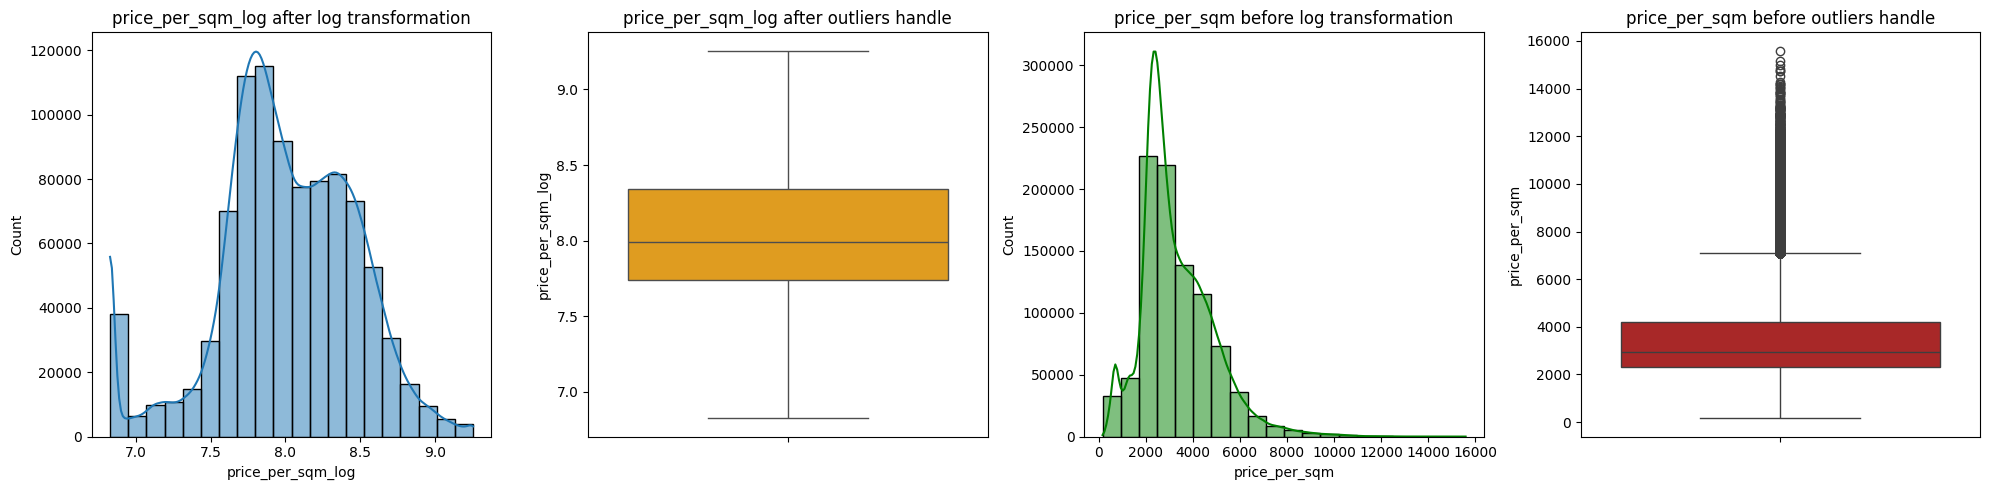

In [42]:
col1=['floor_area_sqm_log','resale_price_log','remaining_lease_log','price_per_sqm_log']
col2=['floor_area_sqm','resale_price','remaining_lease','price_per_sqm']

compare_chart(df,col1,col2)

In [43]:
#drop the columns

df.drop(columns=['street_name', 'floor_area_sqm','resale_price','remaining_lease','price_per_sqm'],inplace=True)

Text(0.5, 1.0, 'Correlation of all features with target feature')

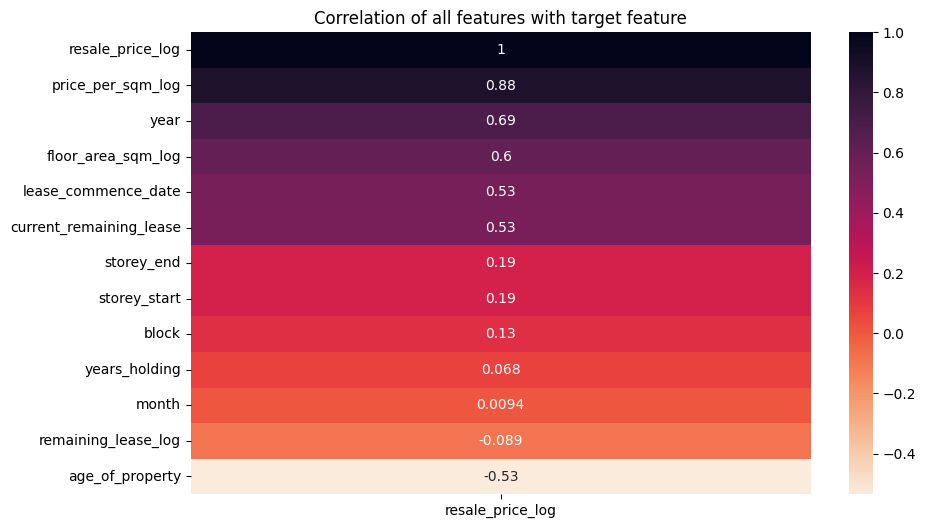

In [44]:
#correlation with heatmap

corr_plt=df[['month','block','floor_area_sqm_log','lease_commence_date','resale_price_log','remaining_lease_log','year','storey_start',
            'storey_end','price_per_sqm_log','years_holding','current_remaining_lease','age_of_property']].corr()

target_corr=corr_plt['resale_price_log'].sort_values(ascending=False)



plt.figure(figsize=(10,6))
sns.heatmap(target_corr.to_frame(),annot=True, cmap='rocket_r')
plt.title('Correlation of all features with target feature')

# Modeling

In [45]:
df_new=df.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928635 entries, 0 to 928685
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    928635 non-null  int64  
 1   town                     928635 non-null  object 
 2   flat_type                928635 non-null  object 
 3   block                    928635 non-null  int64  
 4   flat_model               928635 non-null  object 
 5   lease_commence_date      928635 non-null  int64  
 6   year                     928635 non-null  int64  
 7   storey_start             928635 non-null  int64  
 8   storey_end               928635 non-null  int64  
 9   years_holding            928635 non-null  int64  
 10  current_remaining_lease  928635 non-null  float64
 11  age_of_property          928635 non-null  int64  
 12  floor_area_sqm_log       928635 non-null  float64
 13  resale_price_log         928635 non-null  float64
 14  remaining

In [46]:
# function for encoding the catogorical features

from sklearn.preprocessing import LabelEncoder

def encoding(df,columns):
    le=LabelEncoder()

    df[columns]=le.fit_transform(df[columns])

    unique_labels = le.classes_
    encoded_values = le.transform(unique_labels)

    for i,j in zip(unique_labels,encoded_values):
        print(i,':',j)

In [47]:
df_new['town'].unique()


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [48]:
encoding(df_new,'town')


ANG MO KIO : 0
BEDOK : 1
BISHAN : 2
BUKIT BATOK : 3
BUKIT MERAH : 4
BUKIT PANJANG : 5
BUKIT TIMAH : 6
CENTRAL AREA : 7
CHOA CHU KANG : 8
CLEMENTI : 9
GEYLANG : 10
HOUGANG : 11
JURONG EAST : 12
JURONG WEST : 13
KALLANG/WHAMPOA : 14
LIM CHU KANG : 15
MARINE PARADE : 16
PASIR RIS : 17
PUNGGOL : 18
QUEENSTOWN : 19
SEMBAWANG : 20
SENGKANG : 21
SERANGOON : 22
TAMPINES : 23
TOA PAYOH : 24
WOODLANDS : 25
YISHUN : 26


In [49]:
df['flat_type'].unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [50]:
encoding(df_new,'flat_type')


1 ROOM : 0
2 ROOM : 1
3 ROOM : 2
4 ROOM : 3
5 ROOM : 4
EXECUTIVE : 5
MULTI-GENERATION : 6


In [51]:
df_new['flat_model'].unique()


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [52]:
encoding(df_new,'flat_model')


2-ROOM : 0
3GEN : 1
ADJOINED FLAT : 2
APARTMENT : 3
DBSS : 4
IMPROVED : 5
IMPROVED-MAISONETTE : 6
MAISONETTE : 7
MODEL A : 8
MODEL A-MAISONETTE : 9
MODEL A2 : 10
MULTI GENERATION : 11
NEW GENERATION : 12
PREMIUM APARTMENT : 13
PREMIUM APARTMENT LOFT : 14
PREMIUM MAISONETTE : 15
SIMPLIFIED : 16
STANDARD : 17
TERRACE : 18
TYPE S1 : 19
TYPE S2 : 20


In [53]:
df_new[['town','flat_type','flat_model']]=df_new[['town','flat_type','flat_model']].astype('int64')
df_new.head()


,month,town,flat_type,block,flat_model,lease_commence_date,year,storey_start,storey_end,years_holding,current_remaining_lease,age_of_property,floor_area_sqm_log,resale_price_log,remaining_lease_log,price_per_sqm_log
0,1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,11.011259,4.465908,6.826824
1,1,0,0,309,5,1977,1990,4,6,13,52.0,47,3.635067,11.011259,4.465908,6.826824
2,1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,11.011259,4.465908,6.826824
3,1,0,0,309,5,1977,1990,7,9,13,52.0,47,3.635067,11.011259,4.465908,6.826824
4,1,0,2,216,12,1976,1990,4,6,14,51.0,48,4.290459,11.011259,4.454347,6.826824


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

from sklearn import metrics
import pickle

In [55]:
#split the data into x and y

x=df_new.drop(['resale_price_log'],axis=1)
y=df_new['resale_price_log']

x.shape,y.shape

((928635, 15), (928635,))

In [56]:
# function to choose the best algorithm

def best_ML_algorithm(x,y,algorithms):

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)

                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}

        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]

        return best_algorithm, results

In [57]:
# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor ]

best_algorithm, results = best_ML_algorithm(x,y, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                       Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                  0.008300            0.000937                 0.030604  0.997202
DecisionTreeRegressor             0.001375            0.000168                 0.012978  0.999497
RandomForestRegressor             0.001068            0.000091                 0.009557  0.999727
ExtraTreesRegressor               0.001215            0.000104                 0.010187  0.999690
**Best Algorithm:** RandomForestRegressor


In [58]:
# Desiciontree regressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = DecisionTreeRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.001307610906169701
Mean Squared Error: 0.00014876404367583732
Root Mean Squared Error: 0.012196886638640096
R-squared: 0.9995555805709994


In [59]:
#checkig the features scores and importants

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores


price_per_sqm_log          0.797900
floor_area_sqm_log         0.191767
flat_type                  0.010071
block                      0.000083
town                       0.000052
month                      0.000029
year                       0.000015
storey_end                 0.000013
storey_start               0.000012
current_remaining_lease    0.000011
age_of_property            0.000011
remaining_lease_log        0.000011
flat_model                 0.000010
years_holding              0.000009
lease_commence_date        0.000006
dtype: float64

In [60]:
# store the model using pickle

with open('Decisiontree.pkl','wb') as files:
    pickle.dump(model_regressor,files)


In [61]:
#load the pickle and predict the selling price with regressor model

with open('Decisiontree.pkl','rb') as files:
    model=pickle.load(files)

predict=model.predict(np.array([[1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,4.465908,6.828872]]))
np.exp(predict[0])

60552.049862668086